In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mayavi import mlab

In [42]:
def sphere(r, C):   # r: radius; C: center [cx,cy,cz]
    n = 100
    u = np.linspace(-np.pi, np.pi,n).reshape(-1,1)
    v = np.linspace(0, np.pi,n).reshape(1,-1)
    x = C[0] + r*np.cos(u) * np.sin(v)
    y = C[1] + r*np.sin(u) * np.sin(v)
    z = C[2] + r*np.ones(n).reshape(-1,1) * np.cos(v)
    return x, y, z

In [106]:
exp1 = np.genfromtxt("exp1.txt")
exp2 = np.genfromtxt("exp2.txt")

In [107]:
def transform(exp,w=2.48254237):
    times = np.linspace(0,30,1000)
    x = np.copy(exp[:,0])
    y = np.copy(exp[:,1])
    exp[:,0] = np.cos(w*times)*x - np.sin(w*times)*y
    exp[:,1] = np.sin(w*times)*x + np.cos(w*times)*y
transform(exp1)
transform(exp2)

In [110]:
help(mlab.mesh)

Help on function the_function in module mayavi.tools.helper_functions:

the_function(*args, **kwargs)
    Plots a surface using grid-spaced data supplied as 2D arrays.
    
    **Function signatures**::
    
        mesh(x, y, z, ...)
    
    x, y, z are 2D arrays, all of the same shape, giving the positions of
    the vertices of the surface. The connectivity between these points is
    implied by the connectivity on the arrays.
    
    For simple structures (such as orthogonal grids) prefer the `surf`
    function, as it will create more efficient data structures. For mesh
    defined by triangles rather than regular implicit connectivity, see the
    `triangular_mesh` function.
    
    
    **Keyword arguments:**
    
        :color: the color of the vtk object. Overides the colormap,
                if any, when specified. This is specified as a
                triplet of float ranging from 0 to 1, eg (1, 1,
                1) for white.
                
        :colormap: type 

In [134]:
mlab.plot3d(exp1[:,0],exp1[:,1],exp1[:,2],color=(1,0,0))
mlab.plot3d(exp2[:,0],exp2[:,1],exp2[:,2],color=(0,1,0))
mlab.mesh(*sphere(1,[0,0,0]),color=(1,1,1),opacity=0.5)
mlab.axes(ranges=[-1,1,-1,1,-1,1],
          xlabel=r"$\langle \sigma_x \rangle$",
          ylabel=r"$\langle \sigma_y \rangle$",
          zlabel=r"$\langle \sigma_z \rangle$")
# mlab.orientation_axes()
mlab.show()


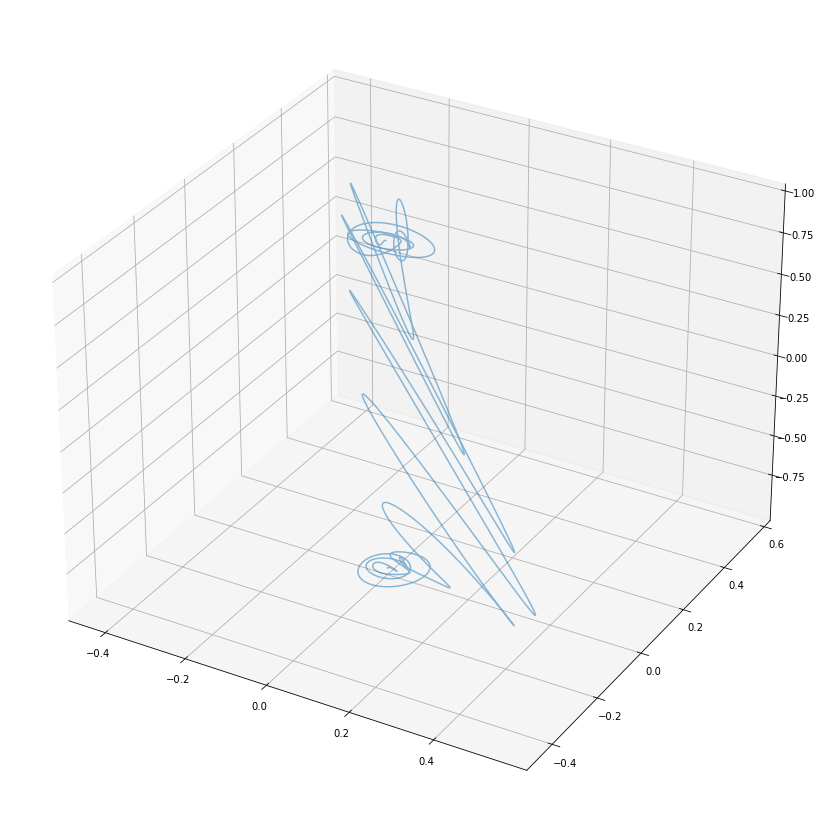

In [7]:
fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection="3d")

# ax.plot_surface(XX,YY,L,alpha=0.5)
ax.plot3D(exp1[:,0],exp1[:,1],exp1[:,2],alpha=0.5)
# ax.plot3D(pts[:-1,0],pts[:-1,1],heights,'r',marker=".")
# ax.set_ylim(0,3)

# ax.plot_surface(XX,YY,np.sqrt(gx**2 + gy**2),alpha=0.5)
# ax.view_init(2.5,180)
# ax.view_init(10,0)

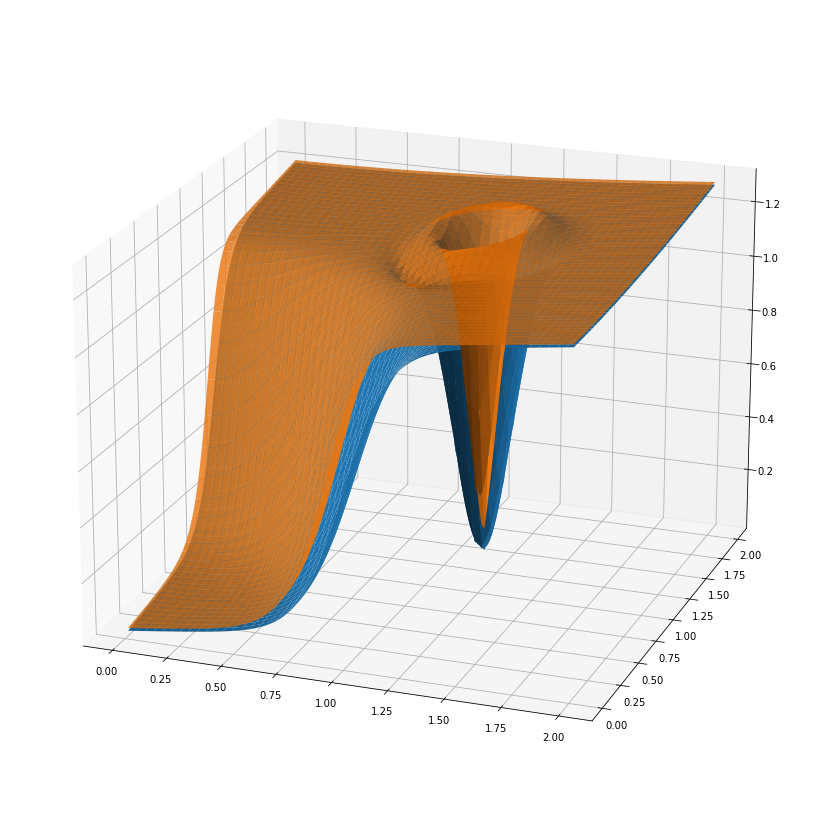

In [131]:
# %matplotlib inline
fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection="3d")

ax.plot_surface(XX,YY,ZZ)
# ax.view_init(90,0)
ax.plot_surface(XX,YY,ZZ + 0.1*ZZ2,alpha=0.8)
# ax.contour3D(XX,YY,ZZ,100,cmap="binary")
# ax.contour3D(XX,YY,ZZ + 0.1*ZZ2,100,cmap="binary")
ax.view_init(20,225+65)

In [234]:
def f(y):
    points.append(y)
    XX = y[0]
    YY = y[1]
    r = np.sqrt(XX**2 + YY**2)

    c1 = 10
    f = 1

    tmp = np.exp(-(r-f)*c1)
    A = 1/(1+tmp)
    Amx = c1*A**2 * tmp * XX/r
    Amy = c1*A**2 * tmp * YY/r

    c2 = 0.1
    B = c2*r
    Bmx = c2*XX/r
    Bmy = c2*YY/r

    c3 = 30
    A1 = 1.2
    mu = 1.2
    C = -A1*np.exp(c3*(- (XX - mu)**2 - (YY - mu)**2))
    Cmx = -c3*C*2*(XX-mu)
    Cmy = -c3*C*2*(YY-mu)


    L = A+B+C
    grad = np.sqrt((Amx + Bmx + Cmx)**2 + (Amy + Bmy + Cmy)**2)
    return L,  np.array([Amx + Bmx + Cmx, Amy + Bmy + Cmy])

points = [np.array([1.02,1.9])]
lr=0.01
for n in range(1000):
    L, grad = f(points[-1])
    points.append(points[-1] - lr*grad)

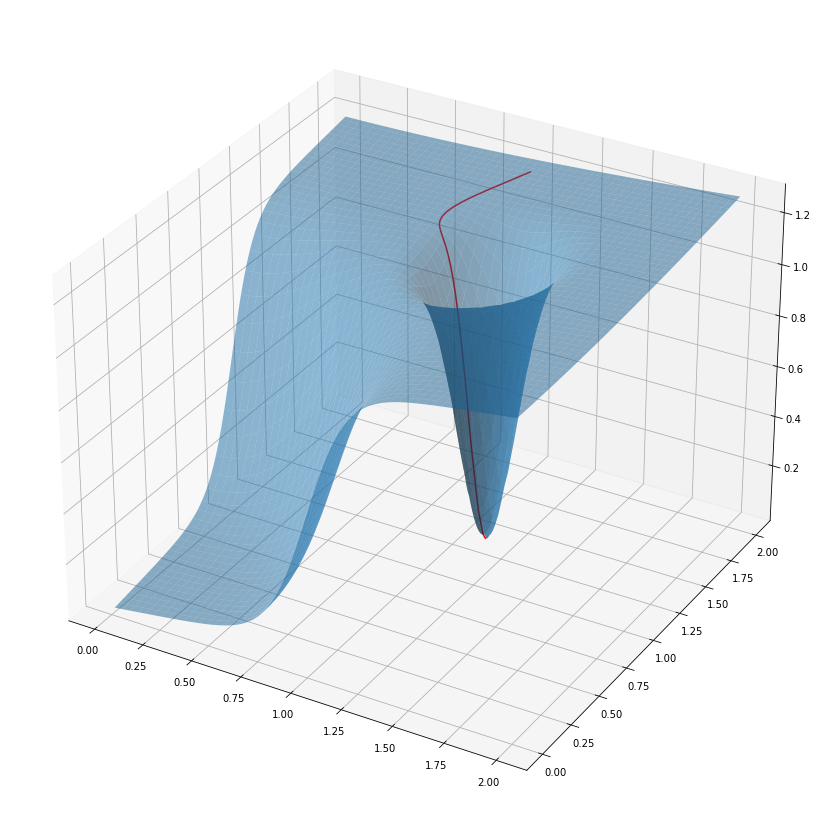

In [237]:
pts = np.asarray(points)

fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection="3d")

ax.plot_surface(XX,YY,ZZ,alpha=0.5)
ax.plot3D(pts[:,0],pts[:,1],loss(pts[:,0],pts[:,1])[0],'r')

In [ ]:
m = 0.1
def f(y):
    points.append(y)
    XX = y[0]
    YY = y[1]
    r = np.sqrt(XX**2 + YY**2)

    c1 = 10
    f = 1

    tmp = np.exp(-(r-f)*c1)
    A = 1/(1+tmp)
    Amx = c1*A**2 * tmp * XX/r
    Amy = c1*A**2 * tmp * YY/r

    c2 = 0.1
    B = c2*r
    Bmx = c2*XX/r
    Bmy = c2*YY/r

    c3 = 30
    A1 = 1.2
    mu = 1.2
    C = -A1*np.exp(c3*(- (XX - mu)**2 - (YY - mu)**2))
    Cmx = -c3*C*2*(XX-mu)
    Cmy = -c3*C*2*(YY-mu)


    L = A+B+C
    grad = np.sqrt((Amx + Bmx + Cmx)**2 + (Amy + Bmy + Cmy)**2)
    return L + m*grad,  np.array([Amx + Bmx + Cmx, Amy + Bmy + Cmy])

points = [np.array([0.5,1.9])]
lr=0.01
for n in range(1000):
    L, grad = f(points[-1])
    points.append(points[-1] - lr*grad)